# Welcome to RL4R 👋

This site is designed for the course Reinforcement Learning for Robotics

You'll find:
- Live Python code cells
- Embedded videos and images
- Step-by-step RL examples

## 💻 Try it yourself below!
Click on the rocket icon above and select Live Code so you can change this line

In [1]:
print("Hello, this is a live cell!")

Hello, this is a live cell!


Now, let's see a code for 10-arm bandit problem with some explanations:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 10            # number of arms
steps = 1000      # number of steps per run
runs = 500        # keep small for speed in Thebe
epsilon = 0.1     # epsilon-greedy

# Track rewards and optimal actions
all_rewards = np.zeros((runs, steps))
optimal_action_counts = np.zeros((runs, steps))

# Simulation
for run in range(runs):
    q_star = np.random.normal(0, 1, k)
    optimal_action = np.argmax(q_star)
    
    Q = np.zeros(k)
    N = np.zeros(k)
    
    for t in range(steps):
        if np.random.rand() < epsilon:
            action = np.random.randint(k)
        else:
            action = np.argmax(Q)

        reward = np.random.normal(q_star[action], 1)
        all_rewards[run, t] = reward
        
        if action == optimal_action:
            optimal_action_counts[run, t] = 1
        
        N[action] += 1
        alpha = 1 / N[action]
        Q[action] += alpha * (reward - Q[action])

# Results
avg_rewards = all_rewards.mean(axis=0)
optimal_action_percent = optimal_action_counts.mean(axis=0) * 100

# Output final Q estimates and optimal action
print("Final estimated Q-values:", Q)
print("True action values (q*):", q_star)
print("Final selected action:", np.argmax(Q))

Final estimated Q-values: [ 0.71713374 -1.19535388 -1.02017075  0.80298141 -0.40846584  0.22966571
  0.0840172  -0.60045027  1.14572204 -0.85617714]
True action values (q*): [ 0.74111616 -0.6743449  -1.42640904  0.96334359 -0.90580972  0.28533691
  0.17895356 -0.28283789  1.13145919 -1.2098597 ]
Final selected action: 8


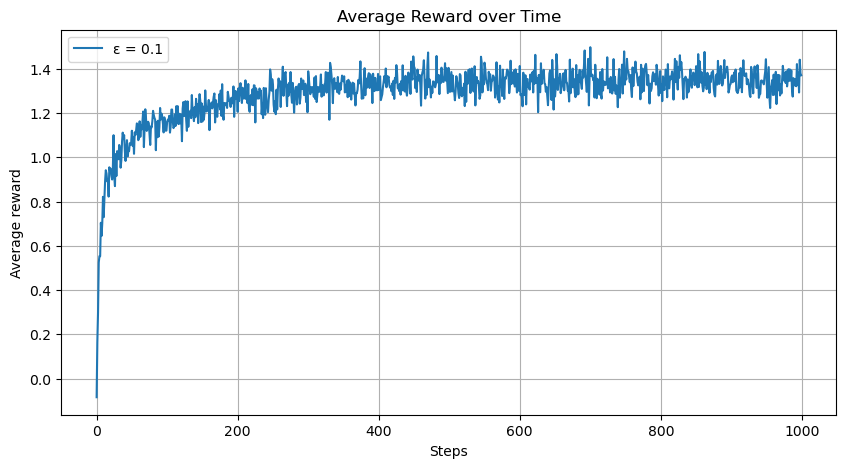

In [3]:
# Plot average reward
plt.figure(figsize=(10, 5))
plt.plot(avg_rewards, label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("Average Reward over Time")
plt.legend()
plt.grid(True)
plt.show()


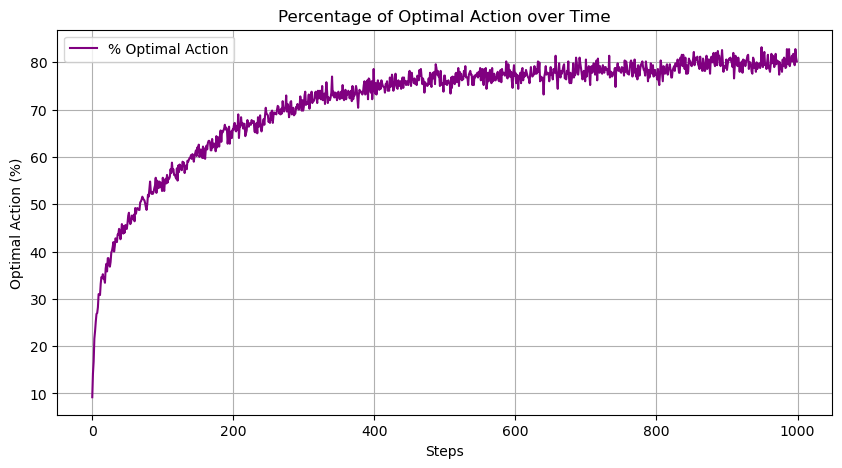

In [4]:
# Plot % optimal action
plt.figure(figsize=(10, 5))
plt.plot(optimal_action_percent, label="% Optimal Action", color="purple")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.title("Percentage of Optimal Action over Time")
plt.legend()
plt.grid(True)
plt.show()
